# TMDb Movies Data Analysis
## By Daniel Jing

### This dataset contains information about 10,000 movies collected from The Movie Database (TMDb). The aim of this analysis is to find out how revenue is related to some numeric varibles such as budget, popularity and runtime, and how vote_count relates to the profitability, namely the revenue.
### The dataset is collected, reorganized and offered by Kaggle.  
### Sourcing: https://www.kaggle.com/tmdb/tmdb-movie-metadata

#### Importing libraries and Reading the file

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tmdb-movies.csv to tmdb-movies.csv
User uploaded file "tmdb-movies.csv" with length 6883750 bytes


In [2]:
df = pd.read_csv('tmdb-movies.csv')
pd.options.display.float_format = '{:20,.2f}'.format
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


#### Generating basic statistics of the data set

In [3]:
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


#### Data wrangling: Removing irrelevant columns and null cells
Since there are 2 columns for budget and revenue, we will use the adjusted ones for each, namely the ones with '_adj' ending.

In [6]:
df.drop(['id','budget','revenue','original_title','cast','homepage','director','tagline','overview','production_companies','release_date','release_year'], axis=1, inplace=True)

In [7]:
df.isnull().any().any(), df.shape

(True, (10866, 9))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       10856 non-null  object 
 1   popularity    10866 non-null  float64
 2   keywords      9373 non-null   object 
 3   runtime       10866 non-null  int64  
 4   genres        10843 non-null  object 
 5   vote_count    10866 non-null  int64  
 6   vote_average  10866 non-null  float64
 7   budget_adj    10866 non-null  float64
 8   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 764.1+ KB


In [9]:
rows = df.shape[0]
df = df.dropna()

In [10]:
df.isnull().any().any(), df.shape

(False, (9364, 9))

In [11]:
rows - df.shape[0]

1502

In [12]:
df.head()

,imdb_id,popularity,keywords,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj
0,tt0369610,32.99,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.50,"137,999,939.28","1,392,445,892.52"
1,tt1392190,28.42,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.10,"137,999,939.28","348,161,292.49"
2,tt2908446,13.11,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.30,"101,199,955.47","271,619,025.41"
3,tt2488496,11.17,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.50,"183,999,919.04","1,902,723,129.80"
4,tt2820852,9.34,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.30,"174,799,923.09","1,385,748,801.47"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9364 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   imdb_id       9364 non-null   object 
 1   popularity    9364 non-null   float64
 2   keywords      9364 non-null   object 
 3   runtime       9364 non-null   int64  
 4   genres        9364 non-null   object 
 5   vote_count    9364 non-null   int64  
 6   vote_average  9364 non-null   float64
 7   budget_adj    9364 non-null   float64
 8   revenue_adj   9364 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 731.6+ KB


In [14]:
df.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,"9,364.00","9,364.00","9,364.00","9,364.00","9,364.00","9,364.00"
mean,0.70,103.17,246.29,6.01,"19,801,169.53","58,927,675.74"
std,1.06,28.67,614.34,0.91,"36,110,417.70","154,131,542.47"
min,0.00,0.00,10.00,1.50,0.00,0.00
25%,0.23,91.00,19.00,5.40,0.00,0.00
50%,0.42,100.00,47.00,6.10,"458,756.45",0.00
75%,0.79,113.00,180.00,6.60,"25,412,744.27","45,986,669.16"
max,32.99,900.00,"9,767.00",9.20,"425,000,000.00","2,827,123,750.41"


In [15]:
#Seperate genres into strings, and only take the first one
df = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df

,imdb_id,popularity,keywords,runtime,vote_count,vote_average,budget_adj,revenue_adj,genres
0,tt0369610,32.99,monster|dna|tyrannosaurus rex|velociraptor|island,124,5562,6.50,"137,999,939.28","1,392,445,892.52",Action
0,tt0369610,32.99,monster|dna|tyrannosaurus rex|velociraptor|island,124,5562,6.50,"137,999,939.28","1,392,445,892.52",Adventure
0,tt0369610,32.99,monster|dna|tyrannosaurus rex|velociraptor|island,124,5562,6.50,"137,999,939.28","1,392,445,892.52",Science Fiction
0,tt0369610,32.99,monster|dna|tyrannosaurus rex|velociraptor|island,124,5562,6.50,"137,999,939.28","1,392,445,892.52",Thriller
1,tt1392190,28.42,future|chase|post-apocalyptic|dystopia|australia,120,6185,7.10,"137,999,939.28","348,161,292.49",Action
...,...,...,...,...,...,...,...,...,...
10863,tt0060161,0.07,car|trolley|stealing car,94,11,6.50,0.00,0.00,Mystery
10863,tt0060161,0.07,car|trolley|stealing car,94,11,6.50,0.00,0.00,Comedy
10864,tt0061177,0.06,spoof,80,22,5.40,0.00,0.00,Action
10864,tt0061177,0.06,spoof,80,22,5.40,0.00,0.00,Comedy


In [16]:
# Grouping genres by revenue, showing the ones have revenue greater than the mean
genre_revenue = df.groupby(['revenue_adj','genres'], as_index=False).sum()
genre_revenue = genre_revenue.query('revenue_adj >= revenue_adj.mean()')
genre_revenue

,revenue_adj,genres,popularity,runtime,vote_count,vote_average,budget_adj
8618,"134,360,293.85",Action,0.30,182,28,7.00,"80,616,176.31"
8619,"134,360,293.85",Adventure,0.30,182,28,7.00,"80,616,176.31"
8620,"134,360,293.85",Drama,0.30,182,28,7.00,"80,616,176.31"
8621,"134,360,293.85",Romance,0.30,182,28,7.00,"80,616,176.31"
8622,"134,360,293.85",War,0.30,182,28,7.00,"80,616,176.31"
...,...,...,...,...,...,...,...
12098,"2,789,712,242.28",Science Fiction,12.04,121,4428,7.90,"39,575,591.36"
12099,"2,827,123,750.41",Action,9.43,162,8458,7.10,"240,886,902.89"
12100,"2,827,123,750.41",Adventure,9.43,162,8458,7.10,"240,886,902.89"
12101,"2,827,123,750.41",Fantasy,9.43,162,8458,7.10,"240,886,902.89"


In [17]:
# Listing the genres according to revenue
pd.options.display.float_format = '{:20,.2f}'.format
g_r = df.groupby('genres')['revenue_adj'].mean().sort_values(ascending=False)
g_r

genres
Adventure               155,458,774.52
Fantasy                 124,172,105.56
Animation               106,721,025.69
Family                  104,432,143.90
Action                  102,131,116.51
Science Fiction          97,814,876.14
War                      77,355,910.97
Thriller                 61,209,504.25
Crime                    61,078,897.59
Mystery                  55,784,026.17
Comedy                   54,480,993.19
Romance                  54,047,361.75
History                  52,006,823.55
Music                    51,992,629.33
Western                  48,629,735.89
Drama                    45,170,411.86
Horror                   27,277,159.59
Documentary               2,706,265.41
Foreign                   2,058,483.82
TV Movie                    442,341.69
Name: revenue_adj, dtype: float64

#### Data visualization

Text(0, 0.5, 'Number of movies')

<Figure size 1058.4x595.44 with 0 Axes>

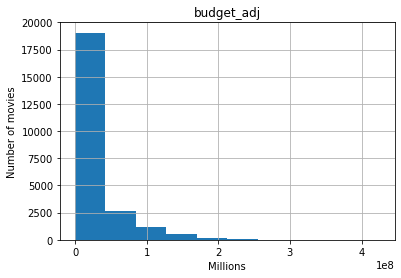

In [18]:
#Displaying histograms of budget
plt.figure(figsize = [14.70,8.27])
df.hist('budget_adj')
plt.xlabel('Millions')
plt.ylabel('Number of movies')

Text(0, 0.5, 'Number of movies')

<Figure size 1058.4x595.44 with 0 Axes>

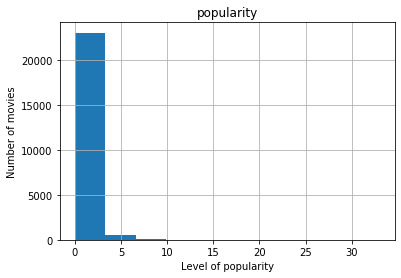

In [19]:
#Displaying histograms of popularity
plt.figure(figsize = [14.70,8.27])
df.hist('popularity')
plt.xlabel('Level of popularity')
plt.ylabel('Number of movies')

Text(0, 0.5, 'Number of movies')

<Figure size 1058.4x595.44 with 0 Axes>

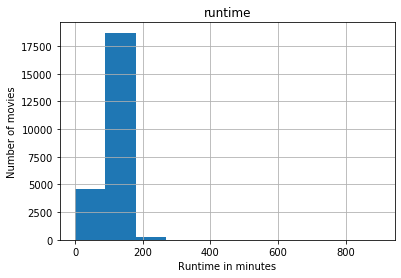

In [20]:
#Displaying histograms of runtime
plt.figure(figsize = [14.70,8.27])
df.hist('runtime')
plt.xlabel('Runtime in minutes')
plt.ylabel('Number of movies')

In [21]:
def sort_by_budget(df):
    return df.sort_values(by = 'budget_adj', ascending = False)['original_title'].head(1)

In [22]:
def sort_by_revenue(df):
    return df.sort_values(by = 'revenue_adj', ascending = False)['original_title'].head(1)

In [23]:
# Creat a list could affect revenue
revenueFactors = ['budget_adj', 'popularity', 'runtime', 'vote_count']

In [24]:
# check how the factors are correlated with revenue
for f in revenueFactors:
    related = df['revenue_adj'].corr(df[f])
    print("%s: %f" % (f,related))

budget_adj: 0.637662
popularity: 0.604702
runtime: 0.203395
vote_count: 0.711002


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

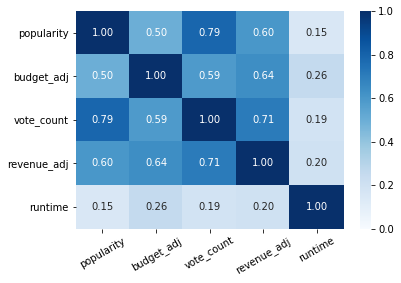

In [25]:
# check how the factors are correlated with each other
movie_stats = ['popularity', 'budget_adj', 'vote_count', 'revenue_adj', 'runtime']
sns.heatmap(df[movie_stats].corr(), annot = True, cmap = 'Blues', fmt = '.2f', vmin = 0)
plt.xticks(rotation = 30)

Text(0.5, 1.0, 'vote_average vs. revenue_adj')

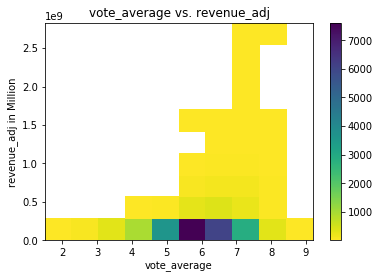

In [26]:
plt.hist2d(data=df, x='vote_average', y='revenue_adj', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar()

plt.xlabel('vote_average')
plt.ylabel('revenue_adj in Million')
plt.title('vote_average vs. revenue_adj')

Text(0.5, 1.0, 'Runtime vs. Revenue')

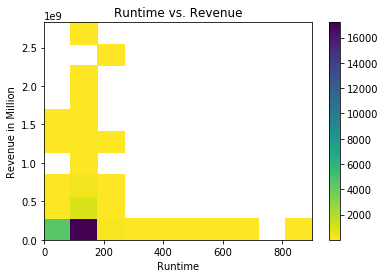

In [27]:
plt.hist2d(data=df, x='runtime', y='revenue_adj', cmap = 'viridis_r', cmin = 0.1);
plt.colorbar()

plt.xlabel('Runtime')
plt.ylabel('Revenue in Million')
plt.title('Runtime vs. Revenue')

Text(0, 0.5, 'Revenue in Million')

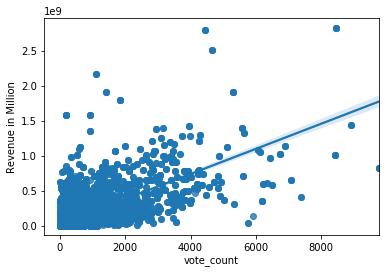

In [28]:
#Displaying scatterplot of 'vote_count' with regression line
sns.regplot(data = df, x = 'vote_count', y = 'revenue_adj')
plt.ylabel('Revenue in Million')

#### Final statistics of how the selected factors relate to revenue

In [29]:
df['intercept'] = 1

lm = sm.OLS(df['revenue_adj'], df[['budget_adj', 'popularity', 'vote_count', 'runtime', 'vote_average']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            revenue_adj   R-squared (uncentered):                   0.639
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              8376.
Date:                Sun, 15 Mar 2020   Prob (F-statistic):                        0.00
Time:                        15:17:24   Log-Likelihood:                     -4.7113e+05
No. Observations:               23628   AIC:                                  9.423e+05
Df Residuals:                   23623   BIC:                                  9.423e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
budget_adj       1.4041      0.023     61.458      0.000       1.359       1.449
popularity    1.135e+07      1e+06     11.292      0.000    9.38e+06    1.33e+07
vote_count    1.148e+05   1866.648     61.519      0.000    1.11e+05    1.18e+05
runtime       -871.5143   2.49e+04     -0.035      0.972   -4.97e+04     4.8e+04
vote_average -6.346e+05   4.38e+05     -1.448      0.147   -1.49e+06    2.24e+05
==============================================================================
Omnibus:                    26976.125   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5679833.186
Skew:                           5.686   Prob(JB):                         0.00
Kurtosis:                      78.099   Cond. No.                     6.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusions
### Finally, based on the analysis and visualizations above, we can draw our conclusion that the revenue of movies from the dataset is highly correlated to budget and popularity, but not so much to runtime. Vote_count has positive correlation with profitability as well.
### Due to the limitation of the sample size of the dataset, we cannot say this is fully represented the situation of the population. Since some of the varibles are categorical ones, so only descriptive statistics are implemented but not inferential statistics.